In [1]:
## 创建一个缺省值的例子

In [2]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
0.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [3]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [4]:
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [ 0., 11., 12., nan]])

In [5]:
### 方法1：去掉缺失值的特征（列）或样本（行）


In [7]:
## 去掉行
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [9]:
## 去掉列
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [11]:
## 只去掉哪些所有值均为nan的行
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,0.0,11.0,12.0,NaN


In [13]:
## 去掉那些非缺失值小于4个的行
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [14]:
## 去掉那些在特定列出现NaN的行
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,0.0,11.0,12.0,NaN


In [15]:
## 直接删掉样本，太可惜。处理缺失值的常用方法：插入法（interpolation）

In [16]:
### 均值估计法 mean imputation

In [18]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values = 'NaN', strategy = 'mean', 
             axis = 0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [ 0. , 11. , 12. ,  6. ]])

In [19]:
### 如果将参数axio=0换成axis=1,则会计算每个样本的所有特种的均值
### 参数strategy的其他取值包括median和most_frequent,most_frequent
### 对处理分类数据类型的缺失值很有用

In [21]:
## 处理分类数据categorical data

In [22]:
### 创建一个新的dataframe对象

In [139]:
import pandas as pd
import numpy as np
df = pd.DataFrame([
    ['green','M',10.1,'class1'],
    ['red','L',13.5,'class2'],
    ['blue','XL',15.3,'class1']])
df.columns = ['color','size','price','classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [25]:
### 映射有序特征

In [199]:
#size_mapping = {'XL':3,'L':2,'M':1}
#size_mapping

In [100]:
#df['size'] = df['size'].map(size_mapping)
#df
## size_mapping用的不对，出现了NaN，为了后面的运算
df = pd.DataFrame([
    ['green','1',10.1,'class1'],
    ['red','2',13.5,'class2'],
    ['blue','3',15.3,'class1']])
df.columns = ['color','size','price','classlabel']

In [101]:
df.values

array([['green', '1', 10.1, 'class1'],
       ['red', '2', 13.5, 'class2'],
       ['blue', '3', 15.3, 'class1']], dtype=object)

In [102]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [ ]:
### 对类别进行编码 encoding class labels

In [103]:
import numpy as np
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [104]:
df['classlabel']=df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [105]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}
df['classlabel']=df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [50]:
### 以上是手动创建的映射字典，sklearn中提供了LableEncoder类来实现类别的转换

In [106]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [52]:
### 上面的fit_transform是fit和transform两个方法的合并
### 我们还可以调用inverse_transform方法得到原始的字符串类型值

In [107]:
class_le.inverse_transform(y)

/Users/vinxe/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

In [57]:
## 对离散特征进行独热编码performing one-hot encoding on nominal features


In [108]:
X = df[['color','size','price']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])


In [61]:
### 对于颜色等无序特征，要特别注意，转换成整数后，不应该有“大小”的概念

In [62]:
### 也就是blue->1,red->0,但blue不大于red

In [64]:
### 所以要用独热编码 one-hot encoding，给每个离散值创建一个哑特征dummpy feature

In [109]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [110]:
X

array([[1, '1', 10.1],
       [2, '2', 13.5],
       [0, '3', 15.3]], dtype=object)

In [111]:
ohe.fit_transform(X)

<3x5 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in COOrdinate format>

In [112]:
### 除了使用sklearn中的OneHotEncoder得到dummpy feature

In [113]:
### 还可以用pandas中的get_dummies，get_dummies默认会对DataFrame中所有字符串类型进行独热编码

In [114]:
import pandas as pd
pd.get_dummies(df[['price','color','size']])


,price,color_blue,color_green,color_red,size_1,size_2,size_3
0,10.1,0,1,0,1,0,0
1,13.5,0,0,1,0,1,0
2,15.3,1,0,0,0,0,1


In [115]:
## 将数据集分割为训练集和测试集

### 使用wine数据集

In [116]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol',
                  'Malic acid','Ash',
                  'Alcalinity of ash','Magnesium',
                  'Total phenols','Flavanoids',
                  'Nonflavanoid phenols',
                  'Paranthocyanins',
                  'Color intensity','Hue',
                  'OD280/OD315 of diluted wines',
                  'proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [118]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Paranthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [119]:
### 一种简单的方法是sklearn.cross_validation中的train_test_split方法


In [120]:
from sklearn.cross_validation import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
                                                   random_state=0)


/Users/vinxe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [121]:
## 统一取值范围，进行特征缩放 feature scaling 

In [122]:
### 方法一：归一化 normalization

In [126]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [127]:
### 方法二：标准化 standardization

In [128]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [129]:
## L1正则


In [130]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='L1') #初始化时，penalty参数设置为L1正则

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='L1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
lr = LogisticRegression(penalty='l1',C=0.1)
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [133]:
print('Training accuracy:', lr.score(X_train_std, y_train))

Training accuracy: 0.9838709677419355


In [134]:
print('Test accuracy:', lr.score(X_test_std, y_test))

Test accuracy: 0.9814814814814815


In [135]:
lr.intercept_

array([-0.38385175, -0.15806911, -0.70045366])

In [136]:
lr.coef_

array([[ 0.2803837 ,  0.        ,  0.        , -0.02800376,  0.        ,
         0.        ,  0.71014999,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23569852],
       [-0.64398614, -0.06878768, -0.0572046 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92677785,
         0.06021204,  0.        , -0.37103676],
       [ 0.        ,  0.06143156,  0.        ,  0.        ,  0.        ,
         0.        , -0.63570065,  0.        ,  0.        ,  0.49790703,
        -0.35849735, -0.57162323,  0.        ]])

In [137]:
import matplotlib.pyplot as plt
fig = plt.figure()

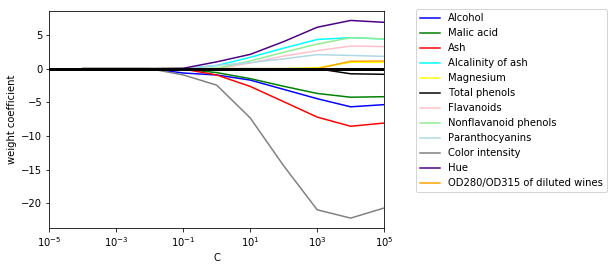

In [144]:
ax = plt.subplot(111)
colors = ['blue','green','red','cyan','yellow','black','pink',
         'lightgreen','lightblue','gray','indigo','orange']
weights, params = [],[]
for c in np.arange(-4,6,dtype=float):
    lr = LogisticRegression(penalty='l1',C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:, column], label = df_wine.columns[column+1], color = color)
    
plt.axhline(0, color = 'black', linestyle = '-', linewidth = 3)
plt.xlim([10**(-5),10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor = (1.38, 1.03), ncol = 1, fancybox = True)
plt.show()

In [145]:
## SBS sequential backward selection 序列后向选择

In [180]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features,
                scoring = accuracy_score,
                test_size = 0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = self.test_size,
                                                            random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                X_test, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r = dim-1):
                score = self._calc_score(X_train, y_train,
                                        X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    def transform(self, X):
        return X[:, self.indices]
       
    def _calc_score(self, X_train, y_train,
                   X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [181]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train_std, y_train)

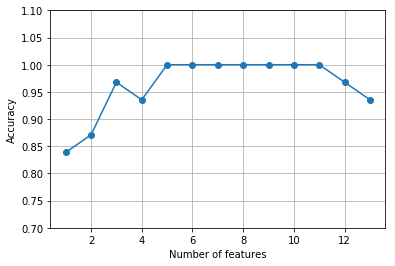

In [182]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [184]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Alcalinity of ash', 'Hue', 'proline'], dtype='object')


In [185]:
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [186]:
print('Training accuracy:', knn.score(X_train_std, y_train))

Training accuracy: 0.9838709677419355


In [187]:
print('Test accuracy:', knn.score(X_test_std, y_test))

Test accuracy: 0.9444444444444444


In [188]:
knn.fit(X_train_std[:,k5],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [189]:
print('Training accuracy:', knn.score(X_train_std[:,k5], y_train))

Training accuracy: 0.9596774193548387


In [190]:
print('Test accuracy:', knn.score(X_test_std[:,k5], y_test))

Test accuracy: 0.9629629629629629


In [191]:
## 使用随机森林评估特征的重要性

In [192]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000,
                               random_state = 0, n_jobs = -1)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [194]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f +1, 30, feat_labels[f],
         importances[indices[f]]))

 1) Alcohol                        0.182483
 2) Malic acid                     0.158610
 3) Ash                            0.150948
 4) Alcalinity of ash              0.131987
 5) Magnesium                      0.106589
 6) Total phenols                  0.078243
 7) Flavanoids                     0.060718
 8) Nonflavanoid phenols           0.032033
 9) Paranthocyanins                0.025400
10) Color intensity                0.022351
11) Hue                            0.022078
12) OD280/OD315 of diluted wines   0.014645
13) proline                        0.013916


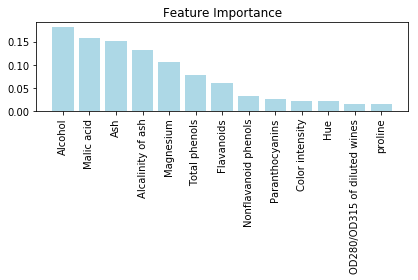

In [196]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
       importances[indices],
       color = 'lightblue',
       align = 'center')
plt.xticks(range(X_train.shape[1]),
          feat_labels, rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()